In [40]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import shapely as shap
import plotly as py
import plotly.graph_objs as go
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Online Shoppers Purchasing Intention

## Predicting the Purchasing intentions of a potential customer by analysing his MetaData(Digital footprints) for targeted marketing.

In [103]:
data=pd.read_csv("online_shoppers_intention.csv")

In [42]:
data.head()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False    False
1               0                      0.0              0                     0.0               2                64.000000         0.00       0.10         0.0         0.0   Feb                 2        2       1            2  Returning_Visitor    False    False
2               0                      0.0              0                     0.0               1                 0.000000         0.20       0.20         0.0         0.0   Feb                 4        1       9            3  Returning_Visitor    False    False
3               0                      0.0              0                     0.0               2                 2.666667         0.05       0.14         0.0         0.0   Feb                 3        2       2            4  Returning_Visitor    False    False
4               0                      0.0              0                     0.0              10               627.500000         0.02       0.05         0.0         0.0   Feb                 3        3       1            4  Returning_Visitor     True    False

In [43]:
data.describe()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay  OperatingSystems       Browser        Region   TrafficType
count    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000      12330.000000  12330.000000  12330.000000  12330.000000
mean         2.315166                80.818611       0.503569               34.472398       31.731468              1194.746220      0.022191      0.043073      5.889258      0.061427          2.124006      2.357097      3.147364      4.069586
std          3.321784               176.779107       1.270156              140.749294       44.475503              1913.669288      0.048488      0.048597     18.568437      0.198917          0.911325      1.717277      2.401591      4.025169
min          0.000000                 0.000000       0.000000                0.000000        0.000000                 0.000000      0.000000      0.000000      0.000000      0.000000          1.000000      1.000000      1.000000      1.000000
25%          0.000000                 0.000000       0.000000                0.000000        7.000000               184.137500      0.000000      0.014286      0.000000      0.000000          2.000000      2.000000      1.000000      2.000000
50%          1.000000                 7.500000       0.000000                0.000000       18.000000               598.936905      0.003112      0.025156      0.000000      0.000000          2.000000      2.000000      3.000000      2.000000
75%          4.000000                93.256250       0.000000                0.000000       38.000000              1464.157213      0.016813      0.050000      0.000000      0.000000          3.000000      2.000000      4.000000      4.000000
max         27.000000              3398.750000      24.000000             2549.375000      705.000000             63973.522230      0.200000      0.200000    361.763742      1.000000          8.000000     13.000000      9.000000     20.000000

In [44]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [45]:
data.corr()

Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems   Browser    Region  TrafficType   Weekend   Revenue
Administrative                 1.000000                 0.601583       0.376850                0.255848        0.431119                 0.373939    -0.223563  -0.316483    0.098990   -0.094778         -0.006347 -0.025035 -0.005487    -0.033561  0.026417  0.138917
Administrative_Duration        0.601583                 1.000000       0.302710                0.238031        0.289087                 0.355422    -0.144170  -0.205798    0.067608   -0.073304         -0.007343 -0.015392 -0.005561    -0.014376  0.014990  0.093587
Informational                  0.376850                 0.302710       1.000000                0.618955        0.374164                 0.387505    -0.116114  -0.163666    0.048632   -0.048219         -0.009527 -0.038235 -0.029169    -0.034491  0.035785  0.095200
Informational_Duration         0.255848                 0.238031       0.618955                1.000000        0.280046                 0.347364    -0.074067  -0.105276    0.030861   -0.030577         -0.009579 -0.019285 -0.027144    -0.024675  0.024078  0.070345
ProductRelated                 0.431119                 0.289087       0.374164                0.280046        1.000000                 0.860927    -0.204578  -0.292526    0.056282   -0.023958          0.004290 -0.013146 -0.038122    -0.043064  0.016092  0.158538
ProductRelated_Duration        0.373939                 0.355422       0.387505                0.347364        0.860927                 1.000000    -0.184541  -0.251984    0.052823   -0.036380          0.002976 -0.007380 -0.033091    -0.036377  0.007311  0.152373
BounceRates                   -0.223563                -0.144170      -0.116114               -0.074067       -0.204578                -0.184541     1.000000   0.913004   -0.119386    0.072702          0.023823 -0.015772 -0.006485     0.078286 -0.046514 -0.150673
ExitRates                     -0.316483                -0.205798      -0.163666               -0.105276       -0.292526                -0.251984     0.913004   1.000000   -0.174498    0.102242          0.014567 -0.004442 -0.008907     0.078616 -0.062587 -0.207071
PageValues                     0.098990                 0.067608       0.048632                0.030861        0.056282                 0.052823    -0.119386  -0.174498    1.000000   -0.063541          0.018508  0.045592  0.011315     0.012532  0.012002  0.492569
SpecialDay                    -0.094778                -0.073304      -0.048219               -0.030577       -0.023958                -0.036380     0.072702   0.102242   -0.063541    1.000000          0.012652  0.003499 -0.016098     0.052301 -0.016767 -0.082305
OperatingSystems              -0.006347                -0.007343      -0.009527               -0.009579        0.004290                 0.002976     0.023823   0.014567    0.018508    0.012652          1.000000  0.223013  0.076775     0.189154  0.000284 -0.014668
Browser                       -0.025035                -0.015392      -0.038235               -0.019285       -0.013146                -0.007380    -0.015772  -0.004442    0.045592    0.003499          0.223013  1.000000  0.097393     0.111938 -0.040261  0.023984
Region                        -0.005487                -0.005561      -0.029169               -0.027144       -0.038122                -0.033091    -0.006485  -0.008907    0.011315   -0.016098          0.076775  0.097393  1.000000     0.047520 -0.000691 -0.011595
TrafficType                   -0.033561                -0.014376      -0.034491               -0.024675       -0.043064                -0.036377     0.078286   0.078616    0.012532    0.052301          0.189154  0.111938  0.047520     1.000000 -0.002221 -0.005113
Weekend                        0.026417                 0.014990 

## EDA

### checking the Distribution of customers on Revenue

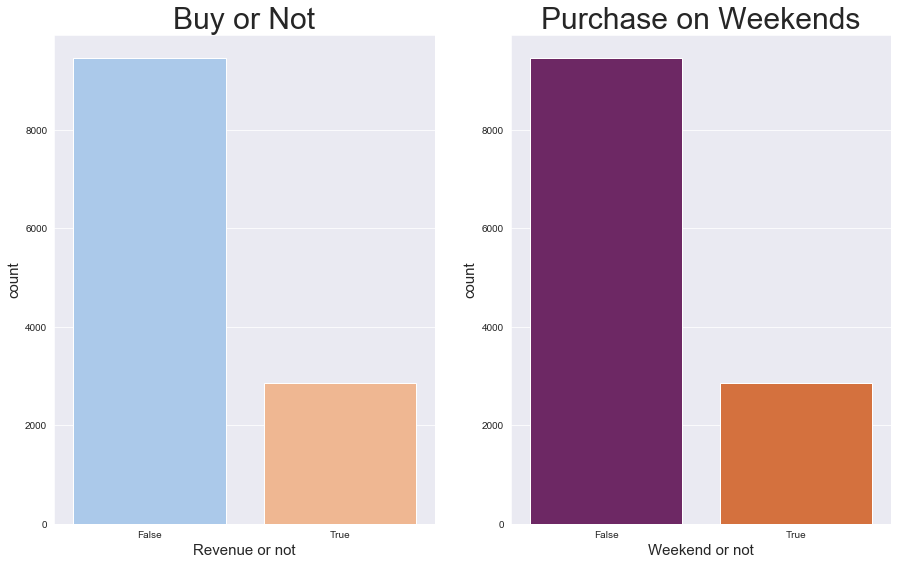

In [46]:
plt.subplot(1, 2, 1)
sns.countplot(data.Weekend, palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Weekend, palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### checking the Distribution of customers based on type of customer and browser used

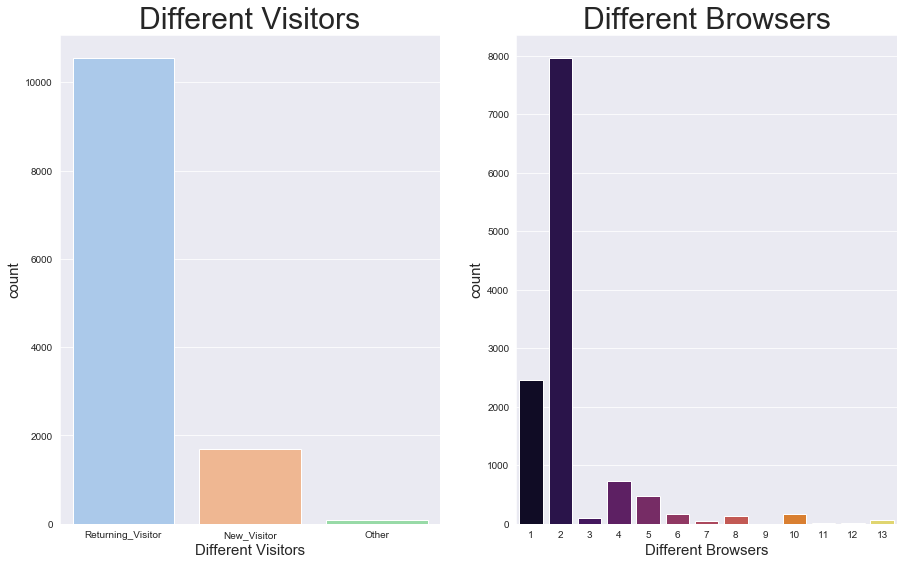

In [47]:
plt.subplot(1, 2, 1)
sns.countplot(data.VisitorType, palette = 'pastel')
plt.title('Different Visitors', fontsize = 30)
plt.xlabel('Different Visitors', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Browser, palette = 'inferno')
plt.title('Different Browsers', fontsize = 30)
plt.xlabel('Different Browsers', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### visualizing the distribution of customers around the Region and Traffic Type

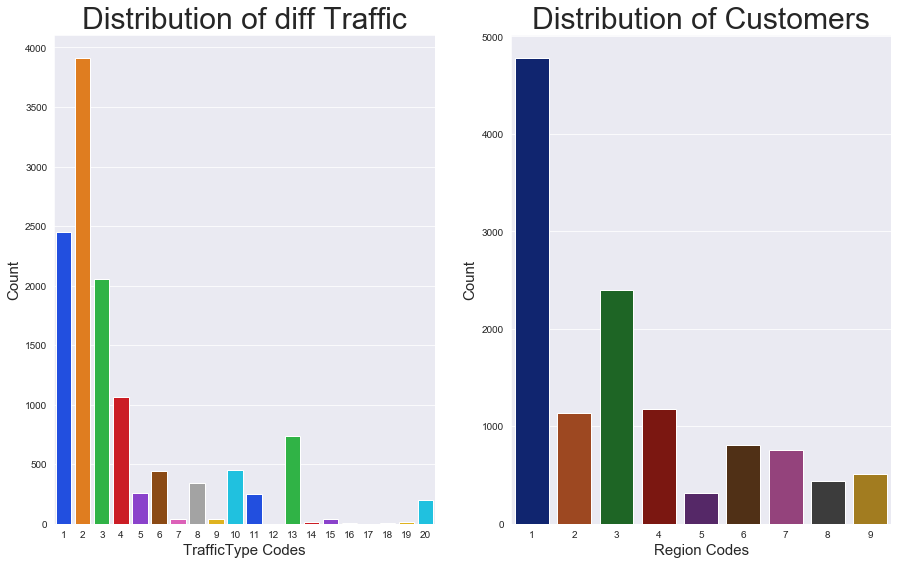

In [48]:

plt.subplot(1, 2, 1)
sns.countplot(data.TrafficType,  palette = 'bright')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Region, palette = 'dark')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### plotting a pie chart for different number of OSes users have and Month

In [49]:
data.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [50]:
data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [51]:
size = [6601, 2585, 2555, 478, 111]#79+19+7+6=111 labeled as others
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"

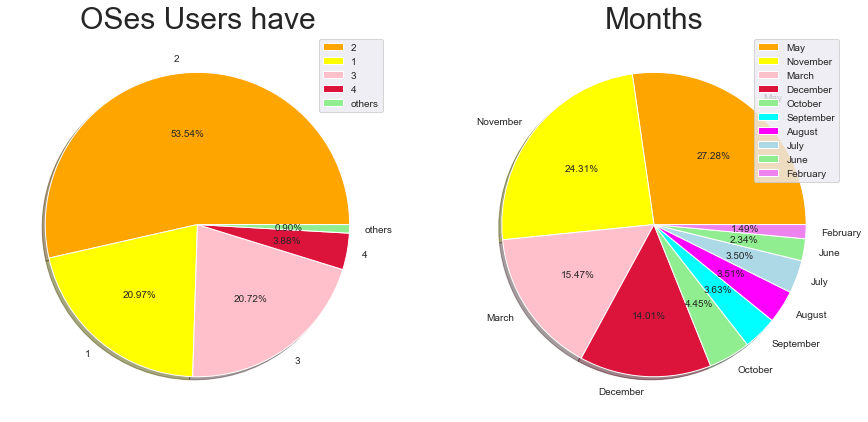

In [52]:
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
plt.axis('off')
plt.legend()
# counts of months
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"


plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Months', fontsize = 30)
plt.axis('off')
plt.legend()

plt.show()

### Analysis against Revenue(Target Variable)

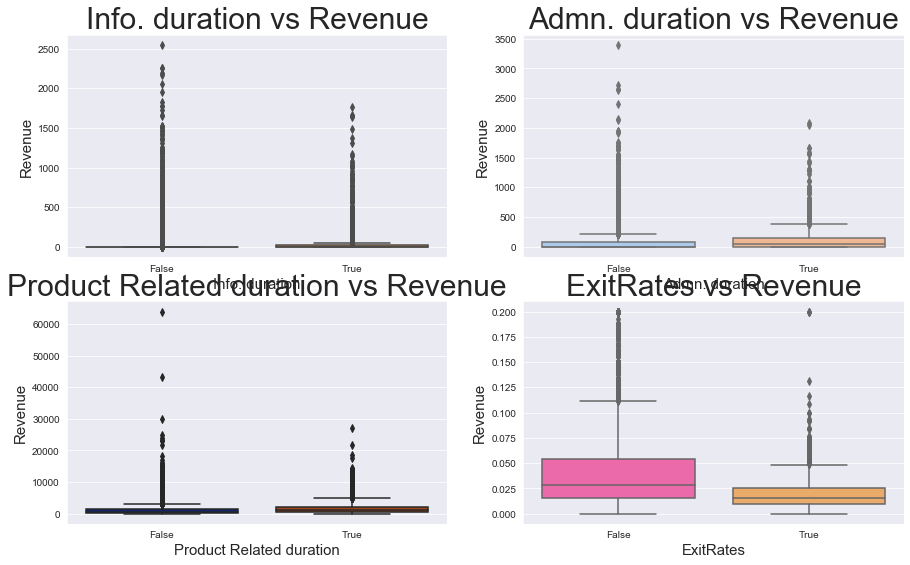

In [53]:
# product related duration vs revenue
plt.subplot(2, 2, 1)
sns.boxplot(data.Revenue, data.Informational_Duration, palette = 'bright')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxplot(data.Revenue, data.Administrative_Duration, palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxplot(data.Revenue, data.ProductRelated_Duration, palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxplot(data.Revenue, data.ExitRates, palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


Text(0, 0.5, 'Revenue')

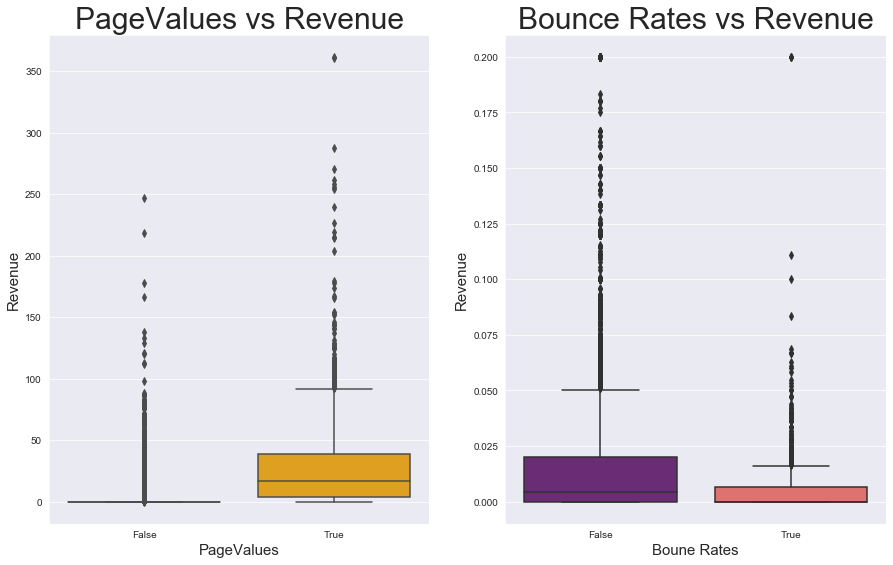

In [54]:
# page values vs revenue


plt.subplot(1, 2, 1)
sns.boxplot(data.Revenue, data.PageValues, palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.boxplot(data.Revenue, data.BounceRates, palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

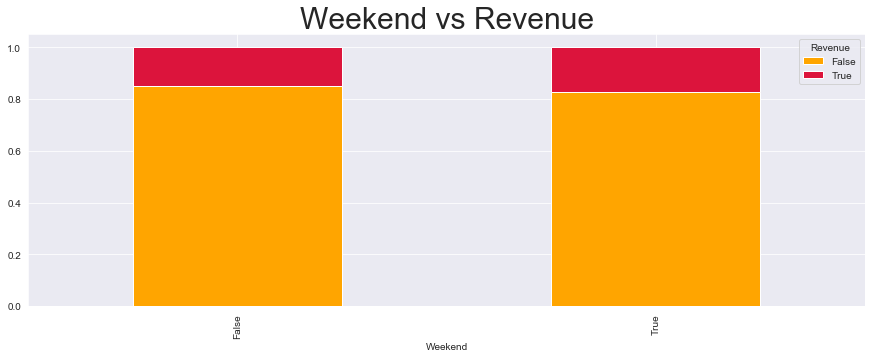

In [55]:
# weekend vs Revenue

df = pd.crosstab(data.Weekend, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

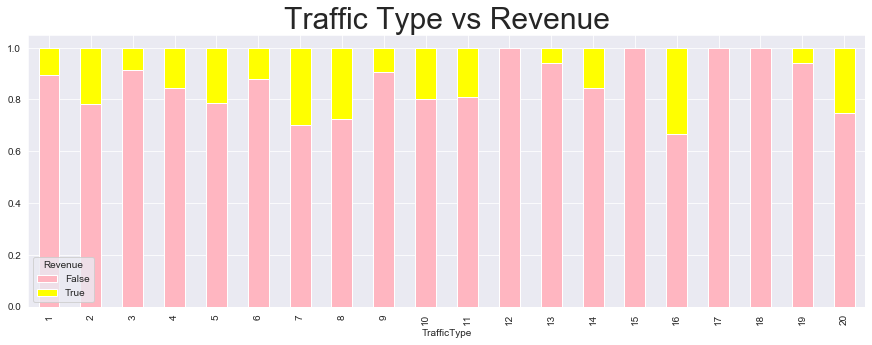

In [56]:
# Traffic Type vs Revenue
df = pd.crosstab(data.TrafficType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

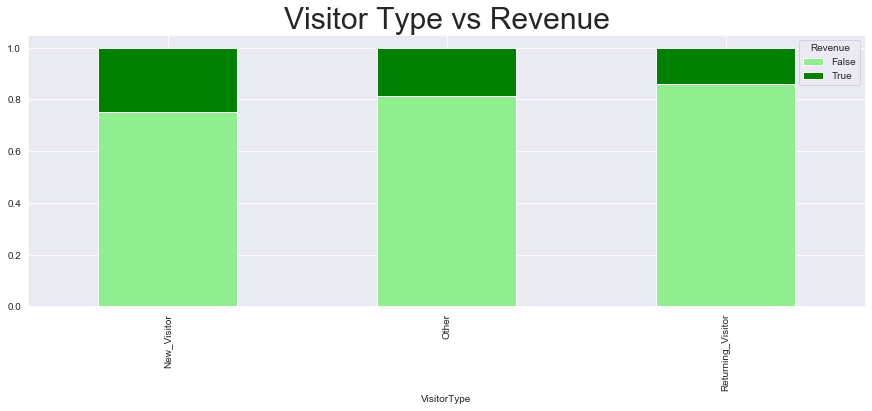

In [57]:
# visitor type vs revenue
df = pd.crosstab(data.VisitorType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

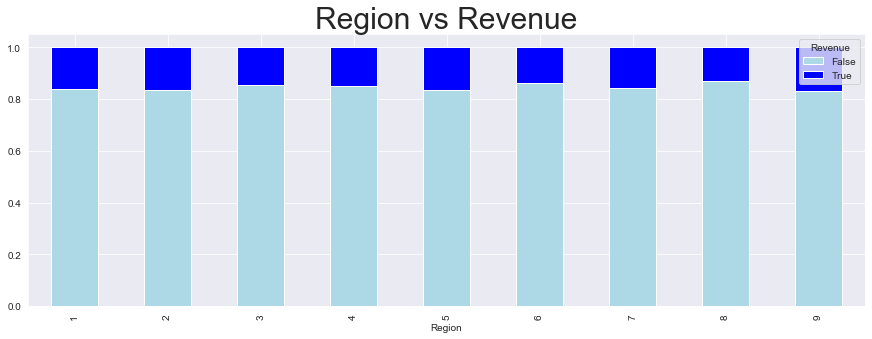

In [58]:
# region vs Revenue
df = pd.crosstab(data.Region, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

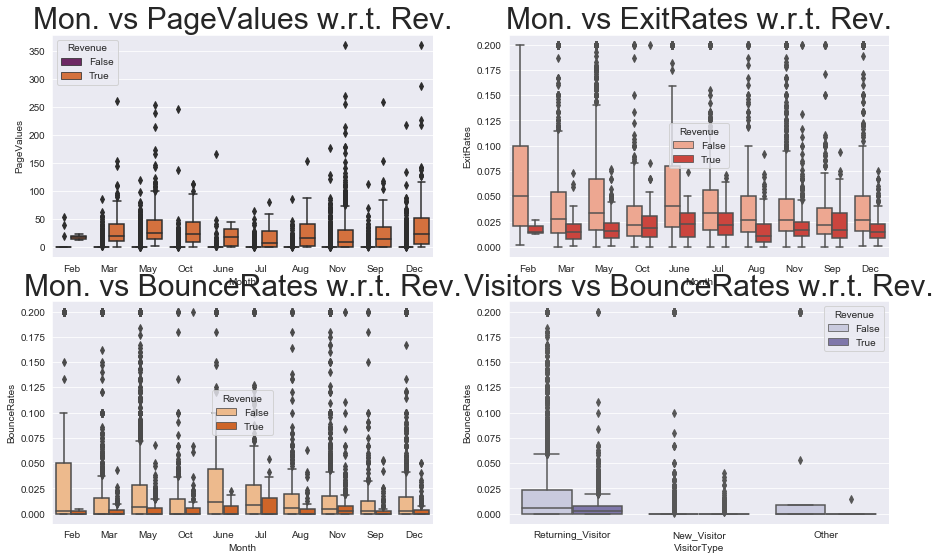

In [59]:
# month vs pagevalues wrt revenue

plt.subplot(2, 2, 1)
sns.boxplot(x = data.Month, y = data.PageValues, hue = data.Revenue, palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.Month, y = data.ExitRates, hue = data.Revenue, palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Month, y = data.BounceRates, hue = data.Revenue, palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.VisitorType, y = data.BounceRates, hue = data.Revenue, palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

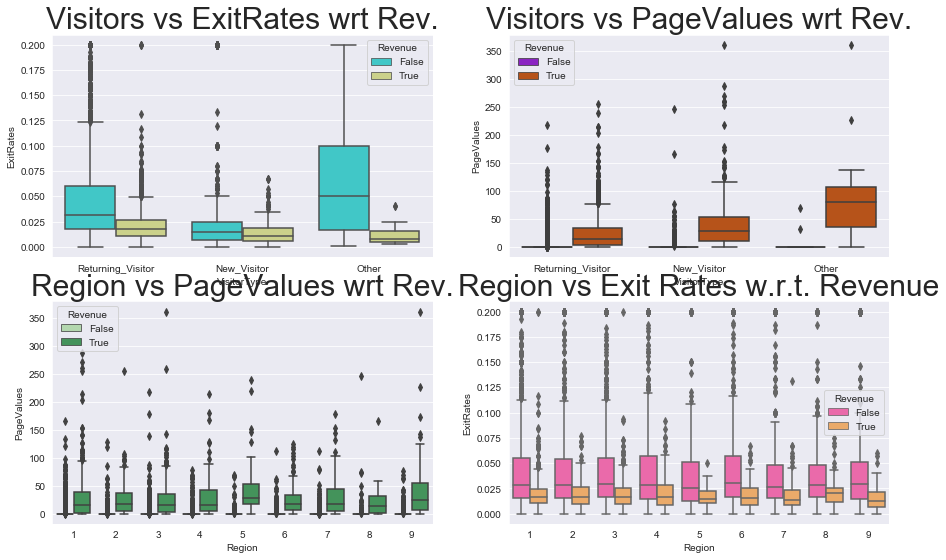

In [60]:

plt.subplot(2, 2, 1)
sns.boxplot(x = data.VisitorType, y = data.ExitRates, hue = data.Revenue, palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.VisitorType, y = data.PageValues, hue = data.Revenue, palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)
# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Region, y = data.PageValues, hue = data.Revenue, palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.Region, y = data.ExitRates, hue = data.Revenue, palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

## Clustering Analysis

### Trying to learn the user characteristics of in terms of time spent on the Website

let's cluster Administrative duration and Bounce Rate to different types of clusters in the dataset.

In [61]:
x = data.iloc[:, [1, 6]]

In [62]:
x.shape

(12330, 2)

In [63]:
from sklearn.cluster import KMeans

In [64]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

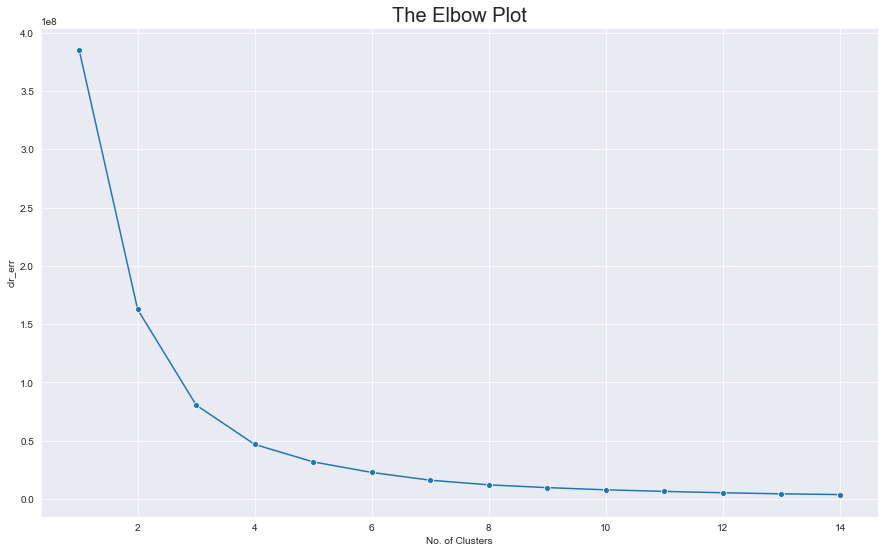

In [65]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fourth index, that is the number of Optimal no. of Clusters for Adminstrative Duration and BounceRates is four. Let's go to the next step, i.e., Plotting the Clusters.

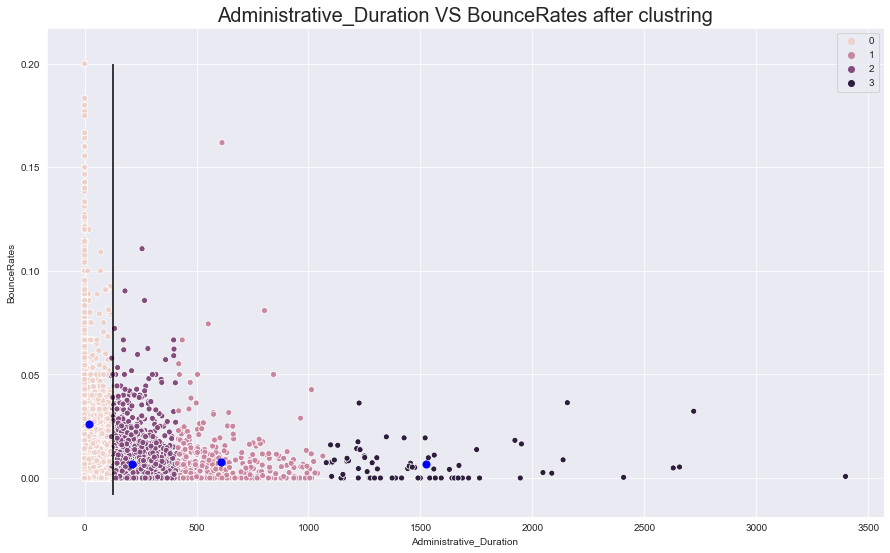

In [66]:
km = KMeans(n_clusters = 4,random_state = 0)
y_means1 = km.fit_predict(x)
sns.scatterplot(x.Administrative_Duration,x.BounceRates,hue=y_means1)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative_Duration VS BounceRates after clustring', fontsize = 20)
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.vlines(x=125,ymin=-0.008,ymax=0.20)
plt.show()

In [67]:
o0=y_means1[y_means1==0]# Revenue which are Flase, Denoted by Vline

In [68]:
len(o0)

9774

let's cluster Page Values and Exit Rate to different types of clusters in the dataset

In [69]:
x = data.iloc[:, [7, 8]]

In [70]:
x.columns

Index(['ExitRates', 'PageValues'], dtype='object')

In [71]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

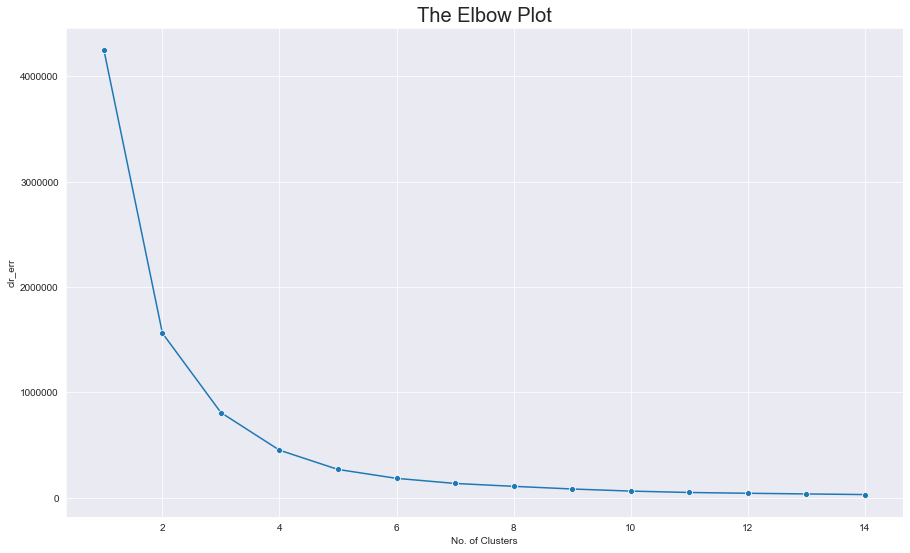

In [72]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fifth index, that is the number of Optimal no. of Clusters for ExitRates and PageValues is five. Let's go to the next step, i.e., Plotting the Clusters.

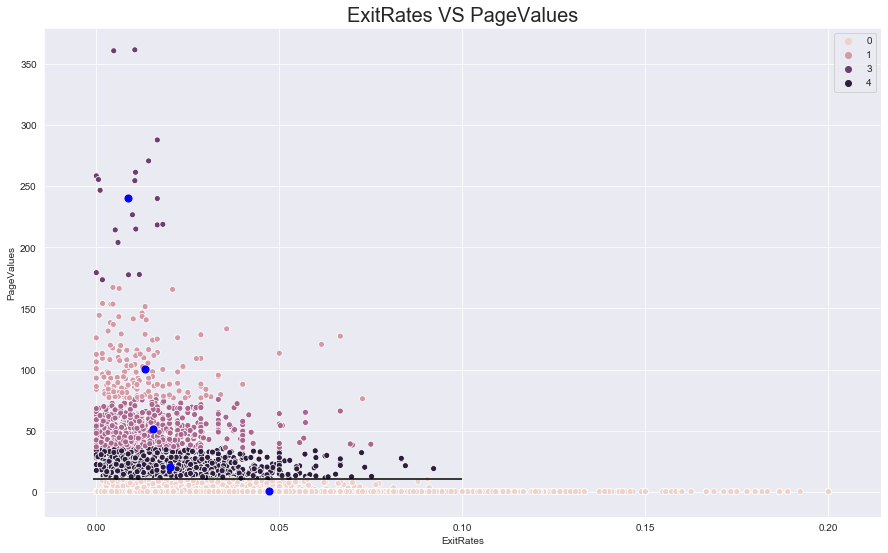

In [73]:
km = KMeans(n_clusters = 5,random_state = 0)
y_means2 = km.fit_predict(x)
sns.scatterplot(x.ExitRates,x.PageValues,hue=y_means2)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('ExitRates VS PageValues', fontsize = 20)
plt.xlabel('ExitRates')
plt.ylabel('PageValues')
plt.hlines(y=10,xmin=-0.001,xmax=0.10)
plt.show()

In [74]:
o0=y_means2[y_means2==0]# Revenue which are Flase, Denoted by Vline

In [75]:
len(o0)# better clustring

10569

## Feature Engineering

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [104]:
objectdata=data[["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType"]]

In [105]:
for i in objectdata.columns:
    if objectdata[i].dtypes!=object:
        objectdata[i]=objectdata[i].astype(object)

C:\Users\Wolborg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [106]:
objectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
SpecialDay          12330 non-null object
Month               12330 non-null object
OperatingSystems    12330 non-null object
Browser             12330 non-null object
Region              12330 non-null object
TrafficType         12330 non-null object
VisitorType         12330 non-null object
dtypes: object(7)
memory usage: 674.4+ KB


In [107]:
objdummies=pd.get_dummies(objectdata)

In [108]:
objdummies.head()

SpecialDay_0.0  SpecialDay_0.2  SpecialDay_0.4  SpecialDay_0.6  SpecialDay_0.8  SpecialDay_1.0  Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  OperatingSystems_1  OperatingSystems_2  OperatingSystems_3  OperatingSystems_4  OperatingSystems_5  OperatingSystems_6  OperatingSystems_7  OperatingSystems_8  Browser_1  Browser_2  Browser_3  Browser_4  Browser_5  Browser_6  Browser_7  Browser_8  Browser_9  Browser_10  Browser_11  Browser_12  Browser_13  Region_1  Region_2  Region_3  Region_4  Region_5  Region_6  Region_7  Region_8  Region_9  TrafficType_1  TrafficType_2  TrafficType_3  TrafficType_4  TrafficType_5  TrafficType_6  TrafficType_7  TrafficType_8  TrafficType_9  TrafficType_10  TrafficType_11  TrafficType_12  TrafficType_13  TrafficType_14  TrafficType_15  TrafficType_16  TrafficType_17  TrafficType_18  TrafficType_19  TrafficType_20  VisitorType_New_Visitor  VisitorType_Other  VisitorType_Returning_Visitor
0               1               0               0               0               0               0          0          0          1          0           0          0          0          0          0          0                   1                   0                   0                   0                   0                   0                   0                   0          1          0          0          0          0          0          0          0          0           0           0           0           0         1         0         0         0         0         0         0         0         0              1              0              0              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                        0                  0                              1
1               1               0               0               0               0               0          0          0          1          0           0          0          0          0          0          0                   0                   1                   0                   0                   0                   0                   0                   0          0          1          0          0          0          0          0          0          0           0           0           0           0         1         0         0         0         0         0         0         0         0              0              1              0              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                        0                  0                              1
2               1               0               0               0               0               0          0          0          1          0           0          0          0          0          0          0                   0                   0                   0                   1                   0                   0                   0                   0          1          0          0          0          0          0          0          0          0           0           0           0           0         0         0         0         0         0         0         0         0         1              0              0              1              0              0              0              0              0              0               0               0               0               0               0               0               0               0               0               0               0                        0                  0                              1
3               1               0  

In [109]:
data_new=pd.concat([data,objdummies],axis=1)

In [110]:
data_new.drop(columns=objectdata.columns,inplace=True)

In [111]:
data_new.shape

(12330, 80)

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le=LabelEncoder()

In [114]:
for i in data_new.columns:
    if data_new[i].dtypes==object or data_new[i].dtypes==bool:
        data_new[i]=le.fit_transform(data_new[i])

In [115]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 80 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
Weekend                          12330 non-null int64
Revenue                          12330 non-null int64
SpecialDay_0.0                   12330 non-null uint8
SpecialDay_0.2                   12330 non-null uint8
SpecialDay_0.4                   12330 non-null uint8
SpecialDay_0.6                   12330 non-null uint8
SpecialDay_0.8                   12330 non-null uint8
SpecialDay_1.0 

## Model Building 

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
from imblearn.over_sampling import SMOTE

In [185]:
smt = SMOTE()

In [123]:
x=data_new.drop(columns="Revenue")
y=data_new.Revenue

In [184]:
x.shape,y.shape

((12330, 79), (12330,))

In [186]:
X,Y=smt.fit_sample(x,y)

In [187]:
X.shape,Y.shape

((20844, 79), (20844,))

In [118]:
model1=LogisticRegression()

In [137]:
model2=RandomForestClassifier(criterion='entropy',n_estimators=1500,n_jobs=-1)

In [180]:
model3=LGBMClassifier(boosting_type='dart',max_depth=5,learning_rate=0.05,n_estimators=100)

In [121]:
model4=XGBClassifier(n_estimators=200,booster='dart',learning_rate=0.05,max_depth=5,n_jobs=1)

In [188]:
for model,name in zip([model1,model2,model3],["LR","RF","LGBM"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X,Y,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.922066808141952 VAR: 0.0046332601080055335 LR
ROC_AUC: 0.9888857991385704 VAR: 0.0007096108742499276 RF
ROC_AUC: 0.9823252863874898 VAR: 0.0008782047284085664 LGBM


ROC_AUC: 0.8971284335984422 VAR: 0.003740805932033355 LR

ROC_AUC: 0.9290301964128769 VAR: 0.0038284661513208083 RF(criterion='entropy',n_estimators=1000,n_jobs=-1)

ROC_AUC: 0.9348681287836562 VAR: 0.001983681494505769 LGBM LGBM(boosting_type='dart',max_depth=5,learning_rate=0.05,n_estimators=100)

In [140]:
paramsLGBM={"boosting_type":["dart","gbdt","goss"],"max_depth":range(1,50,1),"learning_rate":np.arange(0.01,1,0.01),"n_estimators":range(1,2000,30)}

In [141]:
RS=RandomizedSearchCV(model3,paramsLGBM,cv=5,scoring="roc_auc")

In [142]:
RS.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='dart',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=30,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=200, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74

In [143]:
RS.best_estimator_

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.31, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=511, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Model Evaluation

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,stratify=Y)

In [190]:
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [191]:
y_predLR=model1.predict_proba(x_test)[:,1]
y_predRF=model2.predict_proba(x_test)[:,1]
y_predLGBM=model3.predict_proba(x_test)[:,1]

In [192]:
y_LR=model1.predict(x_test)
y_RF=model2.predict(x_test)
y_LGBM=model3.predict(x_test)

### Logestic Regs Evaluation

In [193]:
cm=confusion_matrix(y_test,y_LR)
cm

array([[1840,  244],
       [ 105,  277]], dtype=int64)

In [194]:
roc_auc_score(y_test,y_predLR)

0.9083493282149712

In [195]:
cr=classification_report(y_test,y_LR)

In [196]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2084
           1       0.53      0.73      0.61       382

    accuracy                           0.86      2466
   macro avg       0.74      0.80      0.76      2466
weighted avg       0.88      0.86      0.87      2466



In [197]:
from pdpbox import pdp, info_plots
import shap

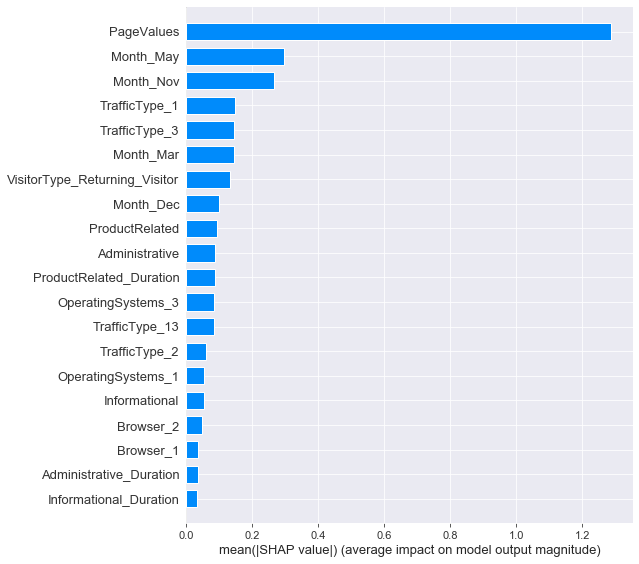

In [198]:
explainer = shap.LinearExplainer(model1,x_test)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type = 'bar')

plotting the partial dependence plot for adminisrative duration

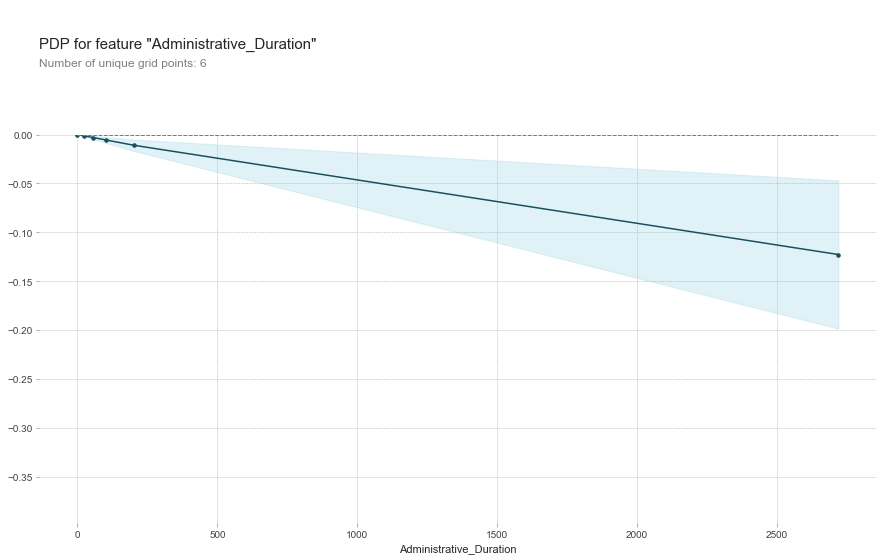

In [199]:
base_features = x_test.columns.values.tolist()
feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model1, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Plotting the partial dependence plot for PageValues

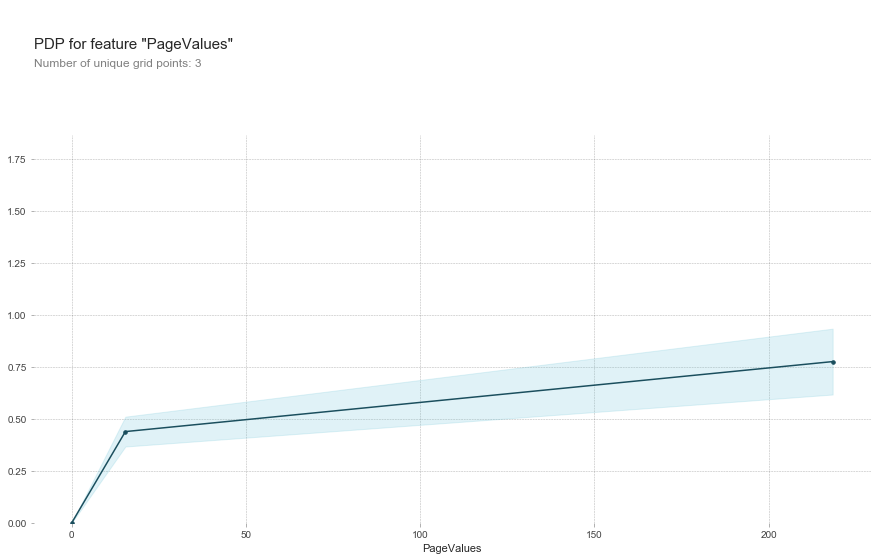

In [200]:
base_features = x_test.columns.values.tolist()
feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model1, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

### Real Time Prediction analysis

In [201]:
# let's create a function to check the users revenue Possibility

def user_analysis(model, user):
    explainer = shap.LinearExplainer(model,x_test)
    shap_values = explainer.shap_values(user)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, user)

In [202]:
count=0
for i in range(0,2466,1):
    if y_test.iloc[i]==1:
        print(i)
        count=count+1
print(count)       

0
2
9
12
14
16
28
29
44
46
50
51
77
79
85
86
88
94
97
100
105
108
114
115
122
126
131
132
168
178
182
187
201
204
211
231
254
266
268
274
286
292
295
313
316
326
331
335
337
340
344
347
350
363
368
374
377
399
405
411
416
444
448
460
461
468
482
486
487
496
504
512
514
516
520
540
542
546
547
548
570
605
607
608
610
612
623
624
638
639
640
642
643
647
648
664
670
672
677
683
685
696
698
699
703
711
714
715
717
719
733
740
742
749
750
752
758
768
779
780
782
789
799
813
815
818
819
821
829
838
848
869
871
872
875
878
887
906
911
921
923
926
937
950
951
953
961
976
977
985
995
1005
1013
1015
1024
1025
1026
1041
1060
1061
1063
1064
1066
1067
1075
1078
1096
1100
1101
1102
1114
1117
1125
1132
1134
1137
1144
1155
1162
1166
1174
1175
1176
1180
1188
1207
1211
1219
1227
1228
1229
1230
1245
1248
1251
1258
1261
1276
1301
1311
1329
1330
1352
1355
1359
1362
1363
1369
1371
1372
1373
1377
1383
1387
1392
1395
1398
1400
1403
1409
1421
1424
1426
1428
1432
1453
1461
1466
1469
1472
1486
1494
1510
1523
152

In [203]:
count2=0
for i in range(0,2466,1):
    if y_LR[i]==1:
        print(i)
        count2=count2+1
print(count2) 

0
9
12
14
18
20
29
44
46
50
51
58
59
62
67
74
77
79
86
88
99
105
114
117
119
122
123
126
130
131
132
145
164
169
173
178
182
187
191
199
204
206
211
212
226
231
242
246
254
263
266
268
269
274
280
295
296
302
313
316
320
323
326
329
331
335
341
343
346
347
350
360
364
368
374
382
383
387
389
390
391
392
399
400
404
409
416
434
435
444
446
448
450
451
459
467
468
486
490
491
492
494
496
504
508
512
514
516
524
530
532
535
545
546
547
548
549
565
566
569
570
572
600
604
607
608
610
612
619
620
624
642
643
647
656
660
669
670
672
683
685
696
699
703
707
711
713
714
715
717
722
725
730
732
733
742
749
750
751
758
768
769
770
779
780
787
788
789
799
800
807
813
819
820
821
829
839
848
858
868
869
870
871
872
878
883
887
892
897
904
906
911
919
921
922
923
926
929
937
944
949
950
951
961
973
974
977
994
1000
1005
1015
1024
1025
1041
1043
1047
1053
1057
1060
1063
1064
1066
1067
1068
1075
1078
1083
1085
1096
1100
1101
1102
1109
1112
1114
1117
1122
1125
1129
1132
1134
1144
1155
1175
1180
1187
1

In [204]:
#real time prediction for users

user = x_test.iloc[1,:].astype(float)
user_analysis(model1, user)#Classifed as 0

In [205]:
user = x_test.iloc[0,:].astype(float)
user_analysis(model1, user)# Classifed as 1

In [206]:
user = x_test.iloc[2,:].astype(float)
user_analysis(model1, user)# misClassifed as 0

### Force Plot

In [207]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test.iloc[:50])

In [208]:
explainer = shap.LinearExplainer(model1,x_test)
expected_value = explainer.expected_value

In [209]:
features = x_test.iloc[[0,1,2]]
shap_values = explainer.shap_values(features)

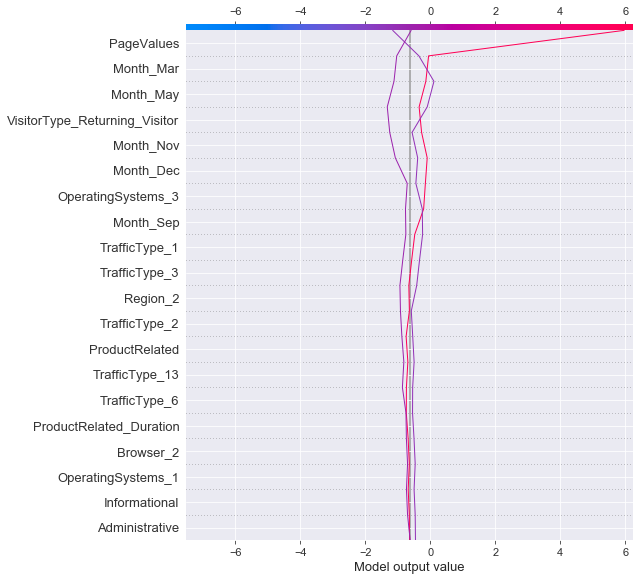

In [210]:
shap.decision_plot(expected_value, shap_values, features)

### Random Forest Evaluation

In [211]:
cm=confusion_matrix(y_test,y_RF)
cm

array([[2068,   16],
       [  26,  356]], dtype=int64)

In [212]:
roc_auc_score(y_test,y_predRF)

0.9965575413773351

In [213]:
cr=classification_report(y_test,y_RF)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2084
           1       0.96      0.93      0.94       382

    accuracy                           0.98      2466
   macro avg       0.97      0.96      0.97      2466
weighted avg       0.98      0.98      0.98      2466



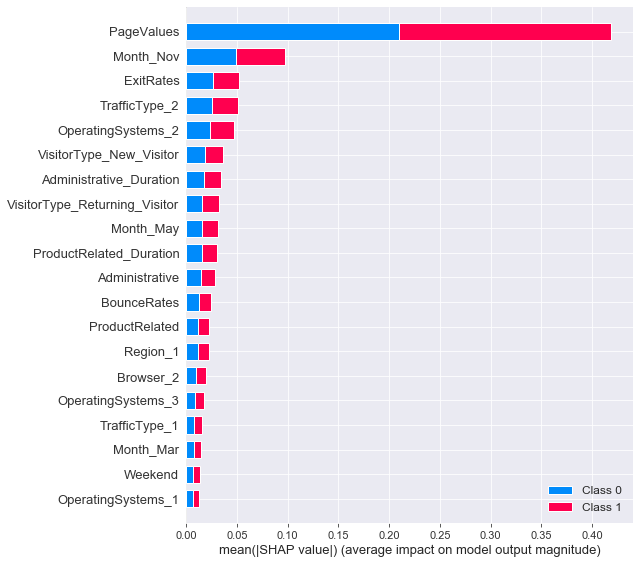

In [214]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type = 'bar')

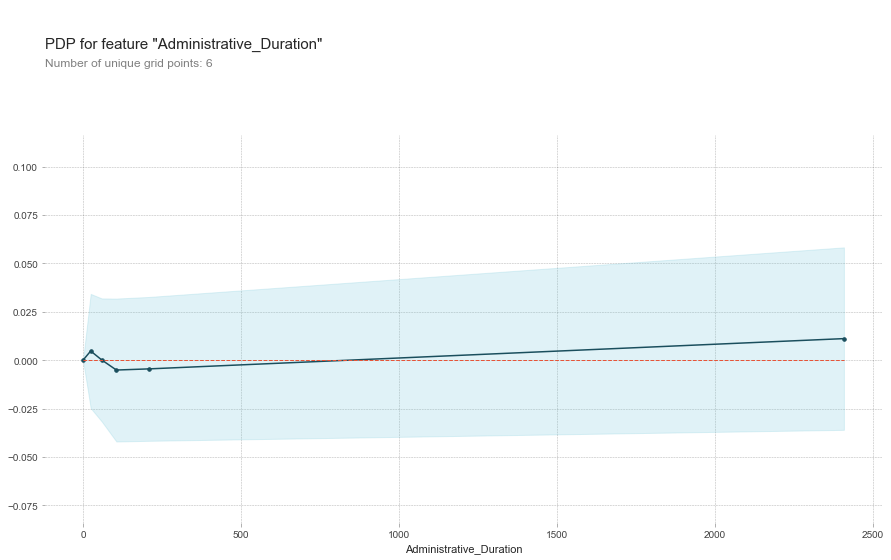

In [81]:
base_features = x_test.columns.values.tolist()
feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

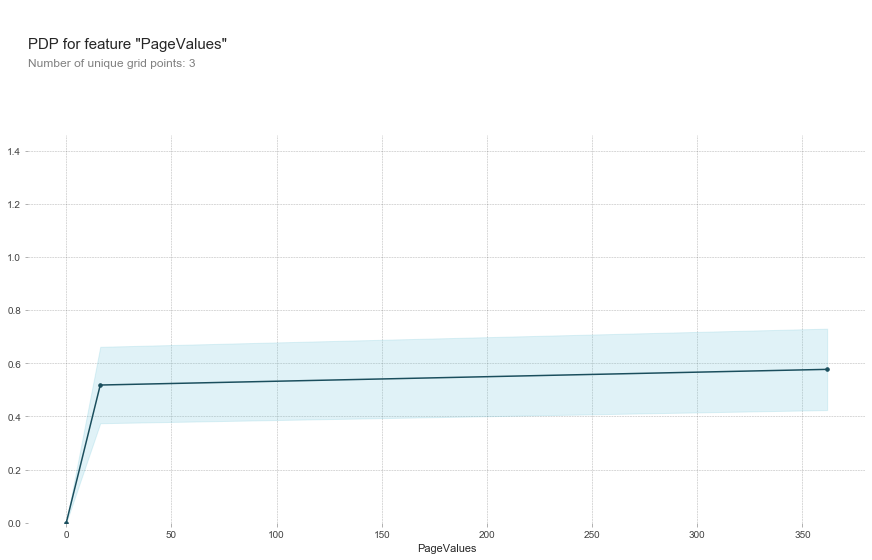

In [82]:
base_features = x_test.columns.values.tolist()
feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [83]:
def user_analysisTree(model, user):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(user)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], user)

In [84]:
#real time prediction for users

user = x_test.iloc[44,:].astype(float)
user_analysisTree(model2, user)# misClassifed as 0

In [85]:
user = x_test.iloc[18,:].astype(float)
user_analysisTree(model2, user)# Classifed as 0

In [86]:
user = x_test.iloc[21,:].astype(float)
user_analysisTree(model2, user)# Classifed as 0

In [87]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])

In [88]:
explainer = shap.TreeExplainer(model2)
expected_value = explainer.expected_value

In [89]:
features = x_test.iloc[[44,21,18]]
shap_values = explainer.shap_values(features)

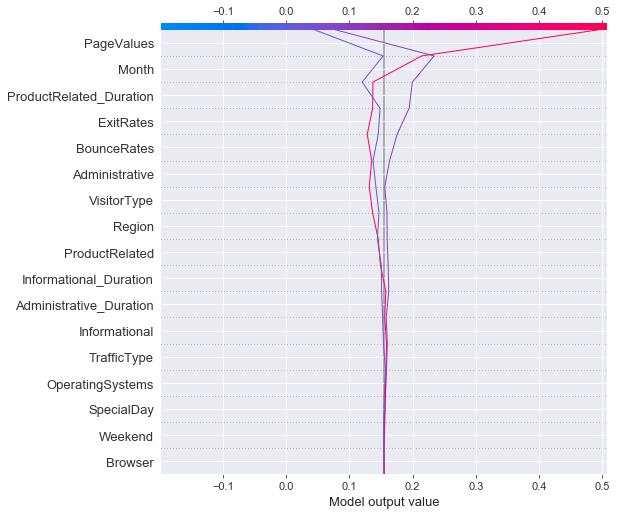

In [90]:
shap.decision_plot(expected_value[1], shap_values[1], features)

### Light GBM Evaluation

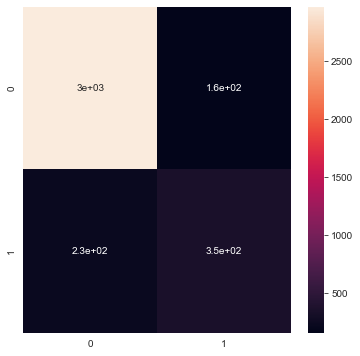

In [91]:
cm=confusion_matrix(y_test,model3.predict(x_test))
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm,annot=True)

In [92]:
cr=classification_report(y_test,model3.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3127
           1       0.69      0.60      0.64       572

    accuracy                           0.90      3699
   macro avg       0.81      0.78      0.79      3699
weighted avg       0.89      0.90      0.89      3699



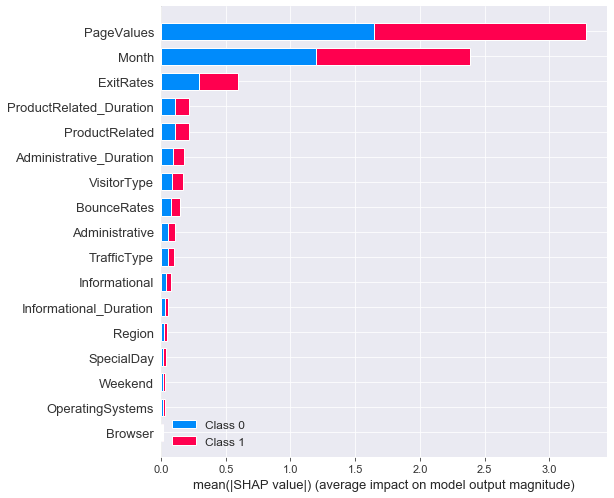

In [93]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type = 'bar')

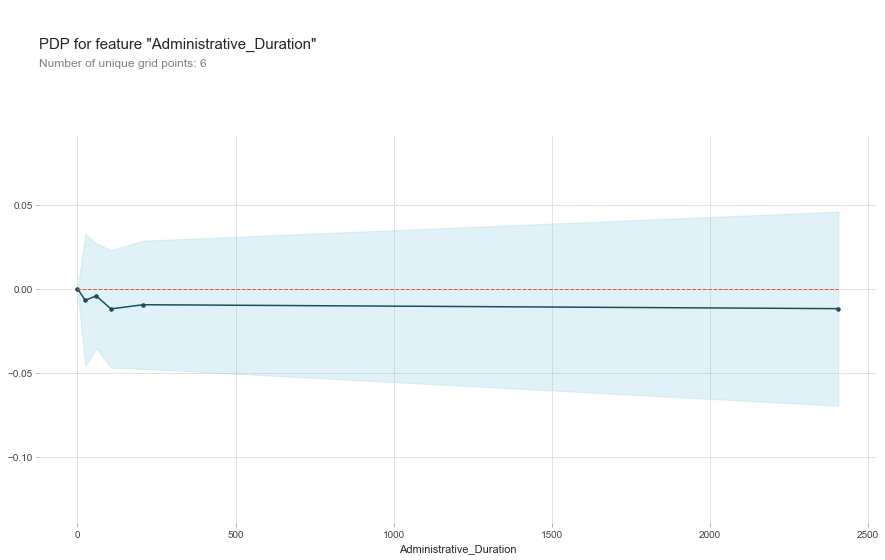

In [94]:
base_features = x_test.columns.values.tolist()
feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

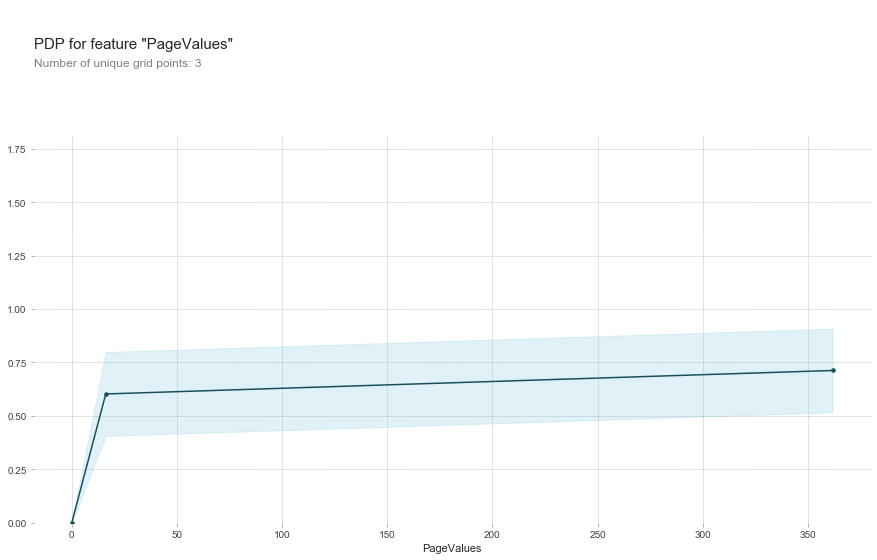

In [95]:
base_features = x_test.columns.values.tolist()
feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features = base_features, feature = feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [96]:
def user_analysisTree1(model, user):
    explainer = shap.TreeExplainer(model,data=x_test)
    shap_values = explainer.shap_values(user)
    shap.initjs()
    return shap.force_plot(explainer.expected_value, shap_values, user)

In [98]:
#real time prediction for users

user = x_test.iloc[44,:].astype(float)
user_analysisTree1(model3, user)# misclassifed as 0

In [100]:
#real time prediction for users

user = x_test.iloc[21,:].astype(float)
user_analysisTree1(model3, user)# Classifed as 1

In [101]:
#real time prediction for users

user = x_test.iloc[33,:].astype(float)
user_analysisTree1(model3, user)# Classifed as 1

In [102]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])

In [107]:
explainer = shap.TreeExplainer(model3)
expected_value = explainer.expected_value

In [108]:
features = x_test.iloc[[44,18,21]]
shap_values = explainer.shap_values(features)

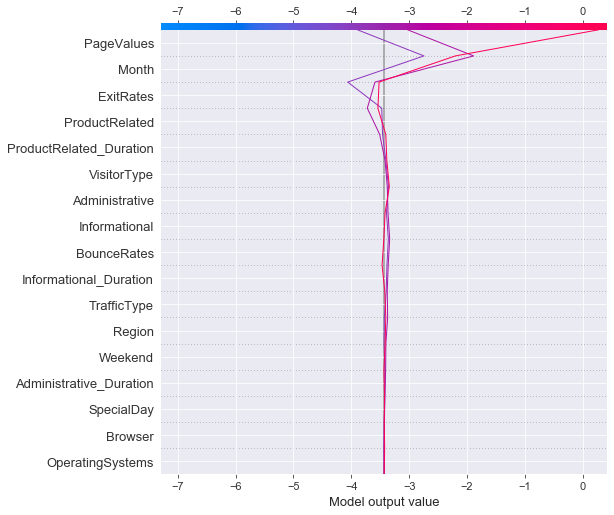

In [109]:
shap.decision_plot(expected_value, shap_values[1], features)